<a href="https://colab.research.google.com/github/LydiaDEdou/projet/blob/main/CNN_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importer les Bibliothèques et Charger le Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import metrics
import numpy as np

# Charger le dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Préparation des Données

In [ ]:
# Obtenir la taille des données d'entraînement
print("Dimensions du dataset d'entraînement:", train_images.shape)

Dimensions du dataset d'entraînement: (60000, 28, 28)


In [ ]:
# Normaliser les images (pixels entre 0 et 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape des données pour correspondre à l'entrée des CNNs (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


**Principe des CNN**
Les CNN fonctionnent en apprenant à détecter des motifs dans des images, comme des bords, des textures, et des objets. Ils se composent principalement de couches de convolution, de pooling et de couches entièrement connectées.




**Couches de Convolution** : Chaque couche de convolution applique plusieurs filtres (ou noyaux) pour détecter des motifs dans une image. Un filtre est une petite matrice qui se déplace (effectue une convolution) sur l'image pour en extraire des caractéristiques spécifiques. Par exemple, certains filtres détectent des bords, tandis que d’autres capturent des textures plus complexes.




 **Couches de Pooling**: Ces couches réduisent la taille des caractéristiques extraites par convolution, en prenant généralement la valeur maximale ou moyenne dans une région. Le pooling réduit ainsi la complexité et les coûts de calcul du réseau tout en conservant les informations essentielles.




**Couches Entièrement Connectées (Dense)**: En fin de réseau, une ou plusieurs couches entièrement connectées combinent toutes les caractéristiques apprises pour effectuer la tâche de classification. Chaque neurone est connecté à tous les neurones de la couche précédente, comme dans un réseau neuronal classique.


3. Construction du Modèle CNN (Architecture Justification)

Pour un modèle simple de CNN sur Fashion MNIST, une architecture séquentielle est souvent utilisée. Dans cette architecture, les couches sont empilées les unes après les autres.

In [ ]:

# Créer un modèle séquentiel
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Première couche de convolution
    MaxPooling2D((2, 2)),                                             # Couche de pooling
    Conv2D(64, (3, 3), activation='relu'),                            # Deuxième couche de convolution
    MaxPooling2D((2, 2)),                                             # Deuxième couche de pooling
    Flatten(),                                                        # Aplatit les caractéristiques pour les couches denses
    Dense(128, activation='relu'),                                    # Couche entièrement connectée
    Dropout(0.5),                                                     # Dropout pour éviter l'overfitting
    Dense(10, activation='softmax')                                   # Couche de sortie pour les 10 classes de Fashion MNIST
])


# Afficher l'architecture du modèle
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Conv2D(32, (3, 3), activation='relu') : Ajoute 32 filtres de convolution de taille 3x3 pour capturer les premiers motifs dans les images.

MaxPooling2D((2, 2)) : Réduit de moitié les dimensions, simplifiant les calculs et réduisant le risque d’overfitting.

Flatten() : Transforme la sortie 2D des couches de convolution en un vecteur 1D pour les couches denses.

Dense(128, activation='relu') : Couche entièrement connectée avec 128 neurones pour combiner les caractéristiques extraites.

Dense(10, activation='softmax') : Couche de sortie avec 10 neurones, un pour chaque classe de Fashion MNIST, utilisant une activation softmax pour la classification multiclasse.

# **4. Compilation du Modèle (Fonction de Perte et Optimiseur)**

Fonctions d’Activation :

ReLU : Utilisé dans les couches de convolution et denses pour introduire de la non-linéarité.
Softmax : Utilisé dans la couche de sortie pour produire des probabilités de classification.
Fonction de Perte : Utilisez sparse_categorical_crossentropy pour les problèmes de classification multiclasse.

Optimiseur : Adam est un optimiseur populaire pour les CNN, car il ajuste dynamiquement le taux d’apprentissage pendant l’entraînement.

In [ ]:
# Compiler le modèle avec la fonction de perte et l'optimiseur
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


5. Entraînement du Modèle (Paramètres d’Entraînement)

In [ ]:
# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7097 - loss: 0.8008 - val_accuracy: 0.8562 - val_loss: 0.3883
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8544 - loss: 0.4057 - val_accuracy: 0.8798 - val_loss: 0.3303
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8753 - loss: 0.3440 - val_accuracy: 0.8936 - val_loss: 0.2883
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8911 - loss: 0.2972 - val_accuracy: 0.8892 - val_loss: 0.2963
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9003 - loss: 0.2784 - val_accuracy: 0.9034 - val_loss: 0.2651
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9033 - loss: 0.2597 - val_accuracy: 0.9084 - val_loss: 0.2527
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9113 - loss: 0.2371 - val_accuracy: 0.9086 - val_loss: 0.2433
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9157 - loss: 0.2264 

6. Évaluation du Modèle (Évaluation des Performances)

In [ ]:
# Évaluer le modèle sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9109 - loss: 0.2722
Test accuracy: 0.9079


7. Prévention de l'Overfitting (Overfitting Prevention)



Pour éviter l'overfitting, nous avons utilisé le Dropout dans le modèle et une validation croisée lors de l'entraînement (avec validation_split=0.2). Vous pouvez aussi expérimenter avec l’augmentation de données.

In [ ]:
# Exemple d'augmentation de données (à ajouter dans le pipeline si nécessaire)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)


8. Courbes d’Apprentissage (Learning Curve Analysis)

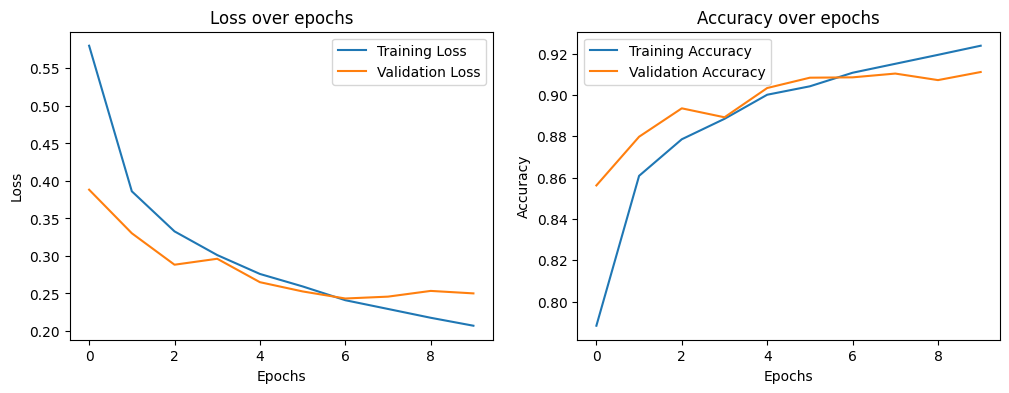

In [ ]:
# Afficher les courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()


9. Optimisation des Hyperparamètres (Hyperparameter Tuning)
Pour tester différentes valeurs, vous pouvez modifier les paramètres du taux d’apprentissage, le nombre de couches ou la taille du batch dans la compilation et l’entraînement.

10. Analyse des Résultats et Améliorations Futures
Interpréter les Résultats : Les courbes d'apprentissage montrent si le modèle est en overfitting (validation loss plus élevé que le training loss) ou en underfitting.
Améliorations Futures : Essayez d'ajuster les hyperparamètres ou d'utiliser des modèles plus profonds si les performances doivent être améliorées.
11. Réflexion et Apprentissage
Ce projet permet de comprendre le fonctionnement des CNNs et de maîtriser les étapes de préparation et d’entraînement. En visualisant les courbes d'apprentissage, on apprend à interpréter les performances d’un modèle.



In [ ]:
from tensorflow.keras.optimizers import Adam

# Définir différents hyperparamètres pour tester
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]
best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Testing model with learning rate={lr} and batch size={batch_size}")

        # Recréer le modèle pour chaque combinaison
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])

        # Compiler le modèle avec le taux d'apprentissage spécifique
        model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # Entraîner le modèle avec la taille de batch spécifiée
        history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_split=0.2)

        # Évaluer les performances
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
        print(f"Test accuracy with lr={lr} and batch_size={batch_size}: {test_accuracy:.4f}")

        # Mettre à jour les meilleurs hyperparamètres
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_params = {'learning_rate': lr, 'batch_size': batch_size}

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_accuracy)



Testing model with learning rate=0.001 and batch size=32
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7167 - loss: 0.7739 - val_accuracy: 0.8645 - val_loss: 0.3679
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8704 - loss: 0.3545 - val_accuracy: 0.8858 - val_loss: 0.3113
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8941 - loss: 0.2920 - val_accuracy: 0.8992 - val_loss: 0.2731
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9032 - loss: 0.2622 - val_accuracy: 0.8994 - val_loss: 0.2733
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2304 - val_accuracy: 0.9056 - val_loss: 0.2658
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9192 - loss: 0.2200 - val_accuracy: 0.9044 - val_loss: 0.2658
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9283 - loss: 0.1934 - val_accuracy: 0.9091 - val_loss: 0.2515
Epoch 8/10
1500/1500 ━━━━━━━━━━━━

# **10. Analyse des Résultats et Améliorations Futures**

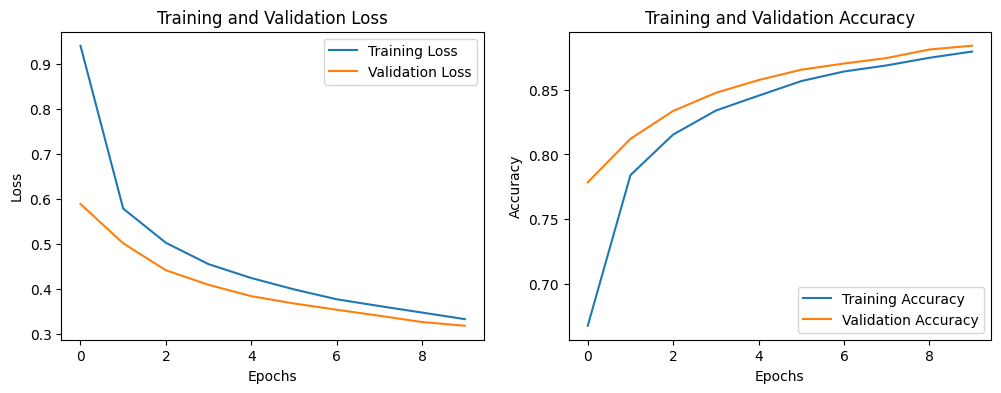

Le modèle semble bien ajusté, avec des performances équilibrées entre l'entraînement et la validation.


In [ ]:
import matplotlib.pyplot as plt

# Affichage des courbes de perte et de précision pour la dernière combinaison testée
plt.figure(figsize=(12, 4))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Courbe de la précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Interprétation des résultats
if history.history['val_loss'][-1] > history.history['loss'][-1]:
    print("Le modèle montre des signes de surapprentissage (overfitting). Envisagez d'ajouter plus de régularisation ou de réduire la complexité du modèle.")
elif history.history['accuracy'][-1] < 0.6:
    print("Le modèle montre des signes de sous-apprentissage (underfitting). Envisagez d'augmenter la capacité du modèle ou d'ajouter plus de couches.")
else:
    print("Le modèle semble bien ajusté, avec des performances équilibrées entre l'entraînement et la validation.")


In [ ]:
# Réflexion sur le projet et apprentissage
print("Réflexion sur le projet :")
print("- Les CNN sont puissants pour la classification d'images et peuvent extraire automatiquement des caractéristiques complexes.")
print("- L'optimisation des hyperparamètres, comme le taux d'apprentissage et la taille de batch, a un impact majeur sur les performances.")
print("- L'utilisation de techniques de régularisation, comme le Dropout et la Batch Normalization, est cruciale pour éviter l'overfitting.")
print("- En analysant les courbes d'apprentissage, j'ai appris à mieux interpréter les performances et à ajuster le modèle en conséquence.")
